# Distributed Training of Neural Network Models


Below is the basic implementation of Federated Learning code for 2 clients and a server for one communication round using the MNIST dataset.

Your task for this lab is to utilize this code as a benchmark and accomplish  the following objectives:

1. Comment each section of the code to understand its functionality.

2. Experiment with different neural network architectures, varying the number of layers and activation functions

3. Assess the model's performance (accuracy, precision, recall, and f-score) as the number of clients changes. Utilize 2, 4, 6, 8, and 10 clients, and plot a graph illustrating the model's performance across varying client counts.

4. Introduce one dishonest client for a any sepcific number of clients of your choice. For this client, assign some training labels ('y_train') to a specific label, such as '4'. Analyze how the performance ((accuracy, precision, recall, and f-score)) of the global model is affected by the presence of a dishonest client. Find approximately how many labels need to be maliciously altered so that the performance degrades.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random


np.random.seed(42) # Set seed for numpy. Put your SID instead of number '42'
random.seed(42) # Set seed for Python's built-in random number generator.  Put your SID instead of number '42'
tf.random.set_seed(42) # Set seed for TensorFlow. Put your SID instead of number '42'
K.clear_session()


# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_client_model(model, x_train, y_train, epochs=5):
    model.fit(x_train, y_train, epochs=epochs, verbose=0)
    return model

# Split data into two clients
x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train, y_train, test_size=0.5, random_state=42)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()

client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)

# Federated averaging
def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights

# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), client2_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


##
##
## Write your code to calculate precision, recall, and F-score
##
##







313/313 - 1s - loss: 0.3576 - accuracy: 0.9016 - 504ms/epoch - 2ms/step
Test accuracy: 0.9016000032424927


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random

In [3]:
np.random.seed(2313800) # Set seed for numpy. Put your SID instead of number '42'
random.seed(2313800) # Set seed for Python's built-in random number generator.  Put your SID instead of number '42'
tf.random.set_seed(2313800) # Set seed for TensorFlow. Put your SID instead of number '42'
K.clear_session()

In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_client_model(model, x_train, y_train, epochs=5):
    model.fit(x_train, y_train, epochs=epochs, verbose=1)
    return model

# Federated averaging
def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights

In [7]:
# Split data into two clients
x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train, y_train, test_size=0.5, random_state=42)


In [8]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()

In [9]:
client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)

Epoch 1/5
938/938 [==============================] - 2s 1ms/step - loss: 0.3484 - accuracy: 0.9000
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1716 - accuracy: 0.9509
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1202 - accuracy: 0.9646
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0875 - accuracy: 0.9736
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0660 - accuracy: 0.9807
Epoch 1/5
938/938 [==============================] - 2s 1ms/step - loss: 0.3405 - accuracy: 0.9027
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1558 - accuracy: 0.9557
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1050 - accuracy: 0.9695
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0752 - accuracy: 0.9792
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0592 - accuracy: 0.9819


In [10]:
# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), client2_model.get_weights())

In [11]:
# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [12]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.4337 - accuracy: 0.8865 - 431ms/epoch - 1ms/step
Test accuracy: 0.8865000009536743


In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
predictions = global_model.predict(x_test)

313/313 [==============================] - 0s 916us/step


In [41]:
predictions = list(np.array(predictions).argmax(axis=1))
predictions

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 8,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 8,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 2,
 9,
 3,
 7,
 4,
 4,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 8,
 7,
 3,
 2,
 9,
 7,
 9,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 8,
 4,
 9,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 2,
 7,
 6,
 7,
 2,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 8,
 0,
 1,
 6,
 2,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 2,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 8,
 0,
 3,
 0,
 3,
 8,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 3,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [42]:
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions, average='weighted'))
print('Recall score: ', recall_score(y_test, predictions, average='weighted'))
print('F1 score: ', f1_score(y_test, predictions, average='weighted'))

Accuracy score:  0.8865
Precision score:  0.8961273611635514
Recall score:  0.8865
F1 score:  0.8873239673499896


# 4 clients

In [43]:
X_train_c12, X_train_c34, y_train_c12, y_train_c34 = train_test_split(x_train, y_train, test_size = 0.5, random_state=2313800)

X_train_c1, X_train_c2, y_train_c1, y_train_c2 = train_test_split(X_train_c12, y_train_c12, test_size=0.5, random_state=2313800)
X_train_c3, X_train_c4, y_train_c3, y_train_c4 = train_test_split(X_train_c12, y_train_c12, test_size=0.5, random_state=2313800)


In [44]:
print(X_train_c1.shape)
print(X_train_c2.shape)
print(X_train_c3.shape)
print(X_train_c4.shape)

print(y_train_c1.shape)
print(y_train_c2.shape)
print(y_train_c3.shape)
print(y_train_c4.shape)

(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000,)
(15000,)
(15000,)
(15000,)


In [45]:
client_1 = create_client_model()
client_2 = create_client_model()
client_3 = create_client_model()
client_4 = create_client_model()

In [46]:
train_client_model(client_1, X_train_c1, y_train_c1)
train_client_model(client_2, X_train_c2, y_train_c2)
train_client_model(client_3, X_train_c3, y_train_c3)
train_client_model(client_4, X_train_c4, y_train_c4)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.8757
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2104 - accuracy: 0.9391
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1517 - accuracy: 0.9554
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1143 - accuracy: 0.9667
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0867 - accuracy: 0.9759
Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.4418 - accuracy: 0.8723
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2107 - accuracy: 0.9385
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1529 - accuracy: 0.9553
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1158 - accuracy: 0.9650
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0899 - accuracy: 0.9743
Epoch 1/5


In [47]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4):
    new_weights = []
    for w1, w2, w3, w4 in zip(weights1, weights2, weights3, weights4):
        new_weights.append((w1 + w2 + w3 + w4) / 4)
    return new_weights

In [48]:
aggregated_weights = federated_average_weights(client_1.get_weights(), 
                                               client_2.get_weights(), 
                                               client_3.get_weights(),
                                               client_4.get_weights())

In [49]:
global_model_4 = create_client_model()
global_model_4.set_weights(aggregated_weights)

In [50]:
test_loss, test_acc = global_model_4.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.9904 - accuracy: 0.7141 - 431ms/epoch - 1ms/step
Test accuracy: 0.7141000032424927


In [51]:
predictions_4 = global_model_4.predict(x_test)
predictions_4 = list(predictions_4.argmax(axis=1))

313/313 [==============================] - 0s 868us/step


In [52]:
print('Accuracy score: ', accuracy_score(y_test, predictions_4))
print('Precision score: ', precision_score(y_test, predictions_4, average='weighted'))
print('Recall score: ', recall_score(y_test, predictions_4, average='weighted'))
print('F1 score: ', f1_score(y_test, predictions_4, average='weighted'))

Accuracy score:  0.7141
Precision score:  0.8243965345301398
Recall score:  0.7141
F1 score:  0.7096672196722389


# 6 clients

In [53]:
X_train_c123, X_train_c456, y_train_c123, y_train_c456 = train_test_split(x_train, y_train, test_size = 0.5, random_state=2313800)

X_train_c12, X_train_c3, y_train_c12, y_train_c3 = train_test_split(X_train_c123, y_train_c123, test_size=0.33333, random_state=2313800)
X_train_c1, X_train_c2, y_train_c1, y_train_c2 = train_test_split(X_train_c12, y_train_c12, test_size=0.5, random_state=2313800)

X_train_c45, X_train_c6, y_train_c45, y_train_c6 = train_test_split(X_train_c456, y_train_c456, test_size=0.33333, random_state=2313800)
X_train_c4, X_train_c5, y_train_c4, y_train_c5 = train_test_split(X_train_c45, y_train_c45, test_size=0.5, random_state=2313800)


In [54]:
print(X_train_c1.shape)
print(X_train_c2.shape)
print(X_train_c3.shape)
print(X_train_c4.shape)
print(X_train_c5.shape)
print(X_train_c6.shape)


print(y_train_c1.shape)
print(y_train_c2.shape)
print(y_train_c3.shape)
print(y_train_c4.shape)
print(y_train_c5.shape)
print(y_train_c6.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


In [55]:
client_1 = create_client_model()
client_2 = create_client_model()
client_3 = create_client_model()
client_4 = create_client_model()
client_5 = create_client_model()
client_6 = create_client_model()

In [56]:
train_client_model(client_1, X_train_c1, y_train_c1)
train_client_model(client_2, X_train_c2, y_train_c2)
train_client_model(client_3, X_train_c3, y_train_c3)
train_client_model(client_4, X_train_c4, y_train_c4)
train_client_model(client_5, X_train_c5, y_train_c5)
train_client_model(client_6, X_train_c6, y_train_c6)

Epoch 1/5
313/313 [==============================] - 1s 1ms/step - loss: 0.5066 - accuracy: 0.8588
Epoch 2/5
313/313 [==============================] - 0s 1ms/step - loss: 0.2358 - accuracy: 0.9320
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1782 - accuracy: 0.9487
Epoch 4/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9622
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.9709
Epoch 1/5
313/313 [==============================] - 1s 1ms/step - loss: 0.5194 - accuracy: 0.8531
Epoch 2/5
313/313 [==============================] - 0s 1ms/step - loss: 0.2351 - accuracy: 0.9324
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1740 - accuracy: 0.9480
Epoch 4/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9594
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1019 - accuracy: 0.9709
Epoch 1/5


In [57]:
def federated_average_weights(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6) / 6)
    return new_weights

In [58]:
aggregated_weights = federated_average_weights(client_1.get_weights(), 
                                               client_2.get_weights(), 
                                               client_3.get_weights(),
                                               client_4.get_weights(),
                                               client_5.get_weights(),
                                               client_6.get_weights())

In [59]:
global_model_6 = create_client_model()
global_model_6.set_weights(aggregated_weights)

In [60]:
global_model_6.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.3235 - accuracy: 0.5980


[1.3235112428665161, 0.5979999899864197]

In [61]:
predictions_6 = global_model_6.predict(x_test)
predictions_6 = list(predictions_6.argmax(axis=1))

313/313 [==============================] - 0s 941us/step


In [62]:
print('Accuracy score: ', accuracy_score(y_test, predictions_6))
print('Precision score: ', precision_score(y_test, predictions_6, average='weighted'))
print('Recall score: ', recall_score(y_test, predictions_6, average='weighted'))
print('F1 score: ', f1_score(y_test, predictions_6, average='weighted'))

Accuracy score:  0.598
Precision score:  0.8277398120517709
Recall score:  0.598
F1 score:  0.5620478576539077


# Model performance

In [66]:
import matplotlib.pyplot as plt

In [73]:
accuracy_score(y_test, predictions)

0.8865

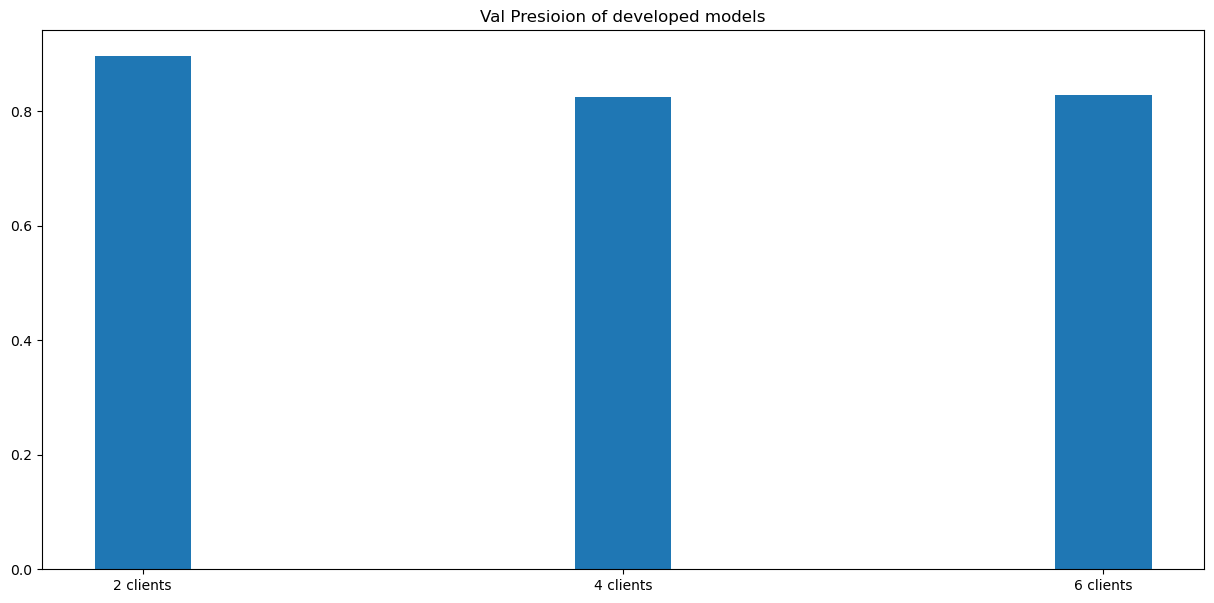

In [87]:
precision_2 = precision_score(y_test, predictions, average='weighted')
precision_4 = precision_score(y_test, predictions_4, average='weighted')
precision_6 = precision_score(y_test, predictions_6, average='weighted')

presicions = [precision_2, precision_4, precision_6]
models_names = ['2 clients', '4 clients', '6 clients']

plt.figure(figsize = (15, 7))

plt.bar(models_names, presicions, width = 0.2)


plt.title('Val Presioion of developed models')
plt.show()

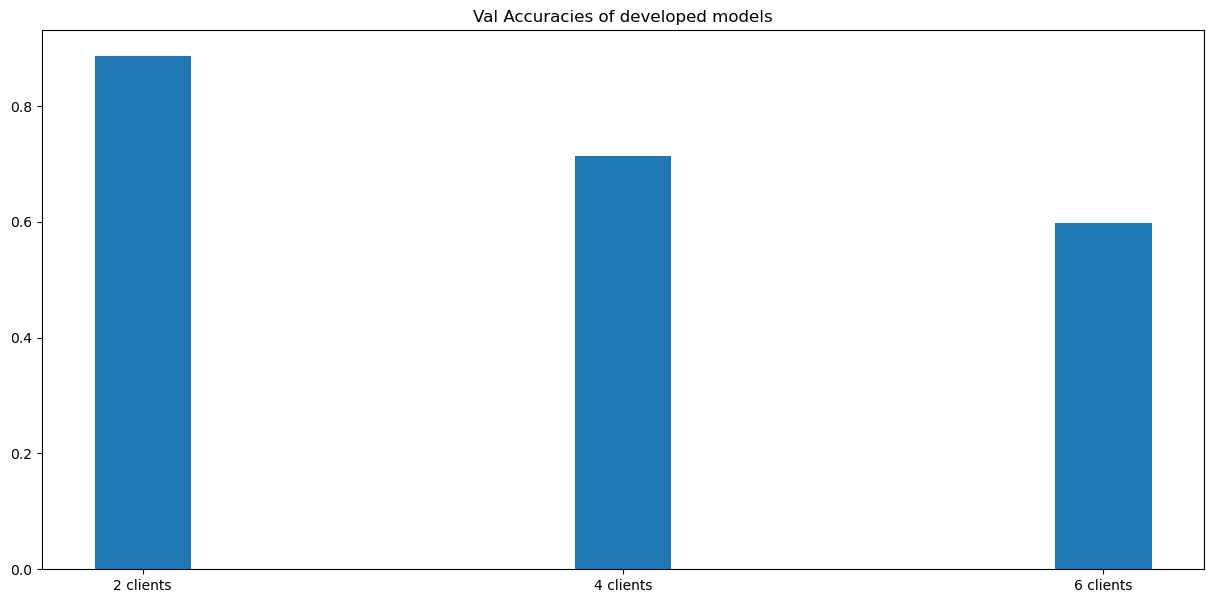

In [85]:
accuracy_2 = accuracy_score(y_test, predictions)
accuracy_4 = accuracy_score(y_test, predictions_4)
accuracy_6 = accuracy_score(y_test, predictions_6)

accuracies = [accuracy_2, accuracy_4, accuracy_6]
models_names = ['2 clients', '4 clients', '6 clients']

plt.figure(figsize = (15, 7))

plt.bar(models_names, accuracies, width = 0.2)



plt.title('Val Accuracies of developed models')
plt.show()

# Lab Logbook requirement: Document the following in lablogbook

1. Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.

2. For any specified number of clients, compare the model's performance when one (or more) dishonest clients are present. Plot the performance metrics before and after the presence of dishonest clients.




# Challenges (Optional):

## The above code is for one communication round. Write code for multiple communication rounds. In each communication round, clients will train the model on a new dataset. Then the server will merge all these models. Subsequently, the clients will retrain the merged model in the next communication round.

